In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [3]:
#import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense , GlobalAveragePooling2D , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [4]:
#ensuring the GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) >0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is being used')
else:
    print('GPU is not being used')

GPU is being used


In [5]:
# Path to the dataset
dataset_path ="/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals"

In [6]:
#List all the classes (Animal type)
#dataset_path = os.path.join(path, "animals")
dataset_path="/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"
classes = os.listdir(dataset_path)
num_classes = len(classes)

In [7]:
# Display number of classes along with names
print(f'Number of classes: {num_classes}')
print(f'Class names: {classes}')

Number of classes: 90
Class names: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


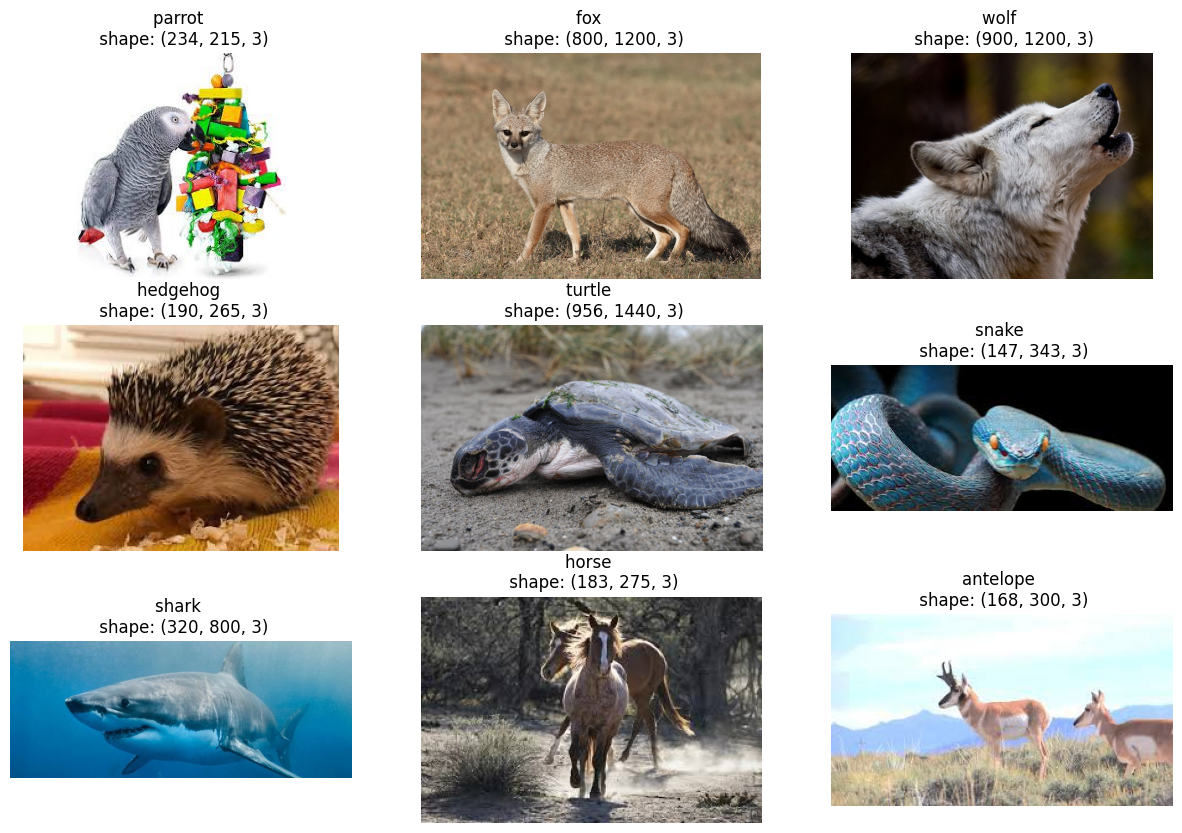

In [17]:
# Visualize some sample images from the dataset
plt.figure(figsize=(15,10))
for i , class_name in enumerate(classes[1:10]):
  class_path= os.path.join(dataset_path , class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path , img_name)
  img= plt.imread(img_path)

  plt.subplot(3, 3 ,i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [21]:
# Preprocessing the data.
# Defining image size and batch_size - Trained model - MobileNetV2 - 224 X 224
img_size = (224,224)
batch_size = 64 # There can be 64 images in a batch

# Data Augmentation and preprocessing
datagen = ImageDataGenerator (
    rescale = 1./255,
    validation_split = 0.1
)

# Creating training and testing generator
train_generator = datagen.flow_from_directory(
    dataset_path ,
    target_size = img_size ,
    batch_size = batch_size ,
    class_mode= 'categorical',
    subset='training'
    )

validation_generator = datagen.flow_from_directory(
    dataset_path ,
    target_size = img_size ,
    batch_size = batch_size ,
    class_mode= 'categorical',
    subset='validation'
    )

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [25]:
# Map the classes - class_indices
class_indices = train_generator.class_indices
print(class_indices)

# Extract class_names
class_names = list(class_indices.keys())
print(class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 